# Group Project: Data-driven Business Manager with APIs

#### Number of points: 30 (weights 30% in the final grade)
#### Deadline to form the groups: October 18th at 12:30 pm CET
#### Deadline for the code submission: October 24th at 01:29 pm CET
#### Presentations on October 24th

## Objective
In this project, you will create a Business that utilizes various APIs to make informed decisions about running your local business. If you want to sell drinks or street food or whatever floats your boat, do not hesitate to find your data and design the project accordingly. You will collect data from meteorological and non-meteorological APIs to help your business determine when, where, and how much inventory is needed to maximize sales. 

## Grading

In total, the group project counts for 30% of the final grade and represents 30 points.

The points are distributed in two parts: the code and the presentation.

- Some items e.g. Statistics are represented in both parts and will require to compute them in the code **and** present them during the presentation.
- Please note that the data must come from an API. You need to use at least 3 APIs (weather + two others). You can also of course use data downloaded from the internet, however they cannot replace the API data.
- Additionally, emphasis will be put on the **Storytelling** and whether or not the choice of APIs, data processing, statistics and visualisations are relevant for your business.
- To make grading easier, please provide **clean code** with **relevant comments** to make it straightforward what you are doing.
- Everyone in the group project must present during presentation day. **A penalty of -2 points** will be applied to each person **who does not present a significant part** during the presentation.


| **Code** | **15 points** |
| --- | --- |
| A. Collect data from weather API | 3 points |
| B. Collect data from two other non-meteorological APIs | 4 points |
| C. Data cleaning and processing | 3 points |
| D. Compute relevant statistics | 2 points |
| E. Clean and clear visualisations  | 3 points |


| **Presentation** | **15 points** |
| --- | --- |
| 1. Description of unique business idea | 1 point |
| 2. Presentation of all the APIs used and how it serves your business | 3 points |
| 3. Presentation of the data cleaning and processing | 2 points |
| 4. Presentation of the statistics | 2 points |
| 5. Presentation of the visualisations and how they serve the business| 3 points |
| 6. Storytelling | 4 points |

**Penalty: -2 points to each person who does not present a significant part during the presentation.**


**Penalty for unexcused absence or lateness**: 
- If you are absent or late on presentation day without an official excuse, you will receive 0 for the presentation part of the group project.
- If you are late without an official excuse and can still make it to the presentation of your team, you will still receive 0 for the presentation part of the group project.

## Getting Ready
#### Recommended deadline: October 8th
#### Deadline: October 18th at 12:30 pm CET

1. Form your group and select a group name. Communicate your group name to the teacher along with the First Name and Last Name of all the team members.

2. Create a branch on the **Students** repository with your group name (exactly the same as the one communicated to the teacher).

3. Discuss with your group and answer the following questions:

   - What kind of business do we run? What do we sell ? The choice of the business must be original and unique to your group.
   - How do we name our business?
   - When do we operate? Is it an all-year-round business or a seasonal one? If so, which seasons? Which months / weeks / days / hours of the day do we operate?
   - Where do we operate? In which countries / cities are we currently active ? Where do we want to develop in the future ? Determine where to set up your business stand based on weather conditions, local attractions, or events. The location should maximize customer traffic and sales.

## Code | A. Collect data from weather API | 3 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Use the OpenWeatherMap API to fetch weather data for your chosen location. You can select any city or location for your business.

- Fetch your chosen location's current temperature and weather conditions.
- Fetch the forecasted weather data for the next few days (e.g., five days).

In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from datetime import datetime
import matplotlib.image as mpimg

In [2]:
weather = requests.get("https://weather-api99.p.rapidapi.com/weather")

In [3]:
my_key = "" # PUT API Key Here

In [4]:
#test code
data = {
    'coord': {'lon': 13.4105, 'lat': 52.5244},
    'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}],
    'base': 'stations',
    'main': {'temp': 60.94, 'feels_like': 60.78, 'temp_min': 58.98, 'temp_max': 62.33, 'pressure': 1024, 'humidity': 86, 'sea_level': 1024, 'grnd_level': 1019},
    'visibility': 10000,
    'wind': {'speed': 9.22, 'deg': 200},
    'rain': {'1h': 0.49},
    'clouds': {'all': 75},
    'dt': 1729501200,
    'sys': {'type': 2, 'id': 2011538, 'country': 'DE', 'sunrise': 1729489373, 'sunset': 1729526321},
    'timezone': 7200,
    'id': 2950159,
    'name': 'Berlin',
    'cod': 200
}

# Extracting specific information
coord = data['coord']
weather = data['weather'][0]
main = data['main']
wind = data['wind']
rain_volume = data.get('rain', {}).get('1h', 0)
sys_data = data['sys']

print(f"Location: {data['name']}, {sys_data['country']}")
print(f"Coordinates: Latitude {coord['lat']}, Longitude {coord['lon']}")
print(f"Weather: {weather['main']} ({weather['description']})")
print(f"Temperature: {main['temp']}°F (Feels like: {main['feels_like']}°F)")
print(f"Pressure: {main['pressure']} hPa, Humidity: {main['humidity']}%")
print(f"Wind: Speed {wind['speed']} m/s, Direction {wind['deg']}°")
print(f"Rain (last hour): {rain_volume} mm")
print(f"Cloudiness: {data['clouds']['all']}%")
print(f"Sunrise: {sys_data['sunrise']}, Sunset: {sys_data['sunset']}")


Location: Berlin, DE
Coordinates: Latitude 52.5244, Longitude 13.4105
Weather: Rain (light rain)
Temperature: 60.94°F (Feels like: 60.78°F)
Pressure: 1024 hPa, Humidity: 86%
Wind: Speed 9.22 m/s, Direction 200°
Rain (last hour): 0.49 mm
Cloudiness: 75%
Sunrise: 1729489373, Sunset: 1729526321


In [5]:
#Api call

url = "https://open-weather13.p.rapidapi.com/city/fivedaysforcast/52.5244/13.4105"

headers = {
	"x-rapidapi-key": my_key,
	"x-rapidapi-host": "open-weather13.p.rapidapi.com"
}

response2 = requests.get(url, headers=headers)

print(response2.json())


{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1729771200, 'main': {'temp': 287.69, 'feels_like': 287.05, 'temp_min': 287.69, 'temp_max': 289.15, 'pressure': 1030, 'sea_level': 1030, 'grnd_level': 1024, 'humidity': 71, 'temp_kf': -1.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'clouds': {'all': 0}, 'wind': {'speed': 4.33, 'deg': 109, 'gust': 6.15}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-10-24 12:00:00'}, {'dt': 1729782000, 'main': {'temp': 288.04, 'feels_like': 287.23, 'temp_min': 288.04, 'temp_max': 288.73, 'pressure': 1029, 'sea_level': 1029, 'grnd_level': 1021, 'humidity': 63, 'temp_kf': -0.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'clouds': {'all': 2}, 'wind': {'speed': 4.14, 'deg': 110, 'gust': 8.12}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-10-24 15:00:00'}, {'dt': 1729792800, 'main': {'temp': 286.66, 'feels_like': 285.71,

In [6]:
response2.json()

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1729771200,
   'main': {'temp': 287.69,
    'feels_like': 287.05,
    'temp_min': 287.69,
    'temp_max': 289.15,
    'pressure': 1030,
    'sea_level': 1030,
    'grnd_level': 1024,
    'humidity': 71,
    'temp_kf': -1.46},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01d'}],
   'clouds': {'all': 0},
   'wind': {'speed': 4.33, 'deg': 109, 'gust': 6.15},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2024-10-24 12:00:00'},
  {'dt': 1729782000,
   'main': {'temp': 288.04,
    'feels_like': 287.23,
    'temp_min': 288.04,
    'temp_max': 288.73,
    'pressure': 1029,
    'sea_level': 1029,
    'grnd_level': 1021,
    'humidity': 63,
    'temp_kf': -0.69},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01d'}],
   'clouds': {'all': 2},
   'wind': {'speed': 4.14, 'deg': 110, 'gust': 8.12},
   'visibility':

In [7]:
#create a dataset of response2

# Load the JSON response into a dictionary
response_json = response2.json()

# Extract the list of forecasts
forecast_list = response_json['list']

# Using your aggregated weather data DataFrame
data = {
    'Day': ['2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-26', '2024-10-27'],
    'Temperature': [286.10500, 284.79875, 285.19875, 286.22750, 287.37000, 285.43000],
    'Feels_Like': [285.476667, 283.916250, 284.095000, 285.523750, 286.920000, 284.765000],
    'Humidity': [77.333333, 76.625000, 66.000000, 76.750000, 79.375000, 78.500000],
    'Weather_Main': ['Clouds', 'Clear', 'Clear', 'Clear', 'Clouds', 'Clouds'],
    'Weather_Description': ['broken clouds', 'clear sky', 'clear sky', 'clear sky', 'few clouds', 'broken clouds'],
    'Wind_Speed': [4.243333, 1.860000, 3.105000, 2.483750, 1.652500, 2.940000],
    'Wind_Deg': [264.333333, 231.250000, 125.500000, 157.000000, 188.625000, 318.000000],
    'POP': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}


# Create a list to store formatted data
data = []

# Iterate through each forecast and extract relevant information
for forecast in forecast_list:
    date = datetime.strptime(forecast['dt_txt'], '%Y-%m-%d %H:%M:%S').date()  # Extract only the date
    temp = forecast['main']['temp']
    feels_like = forecast['main']['feels_like']
    humidity = forecast['main']['humidity']
    weather_main = forecast['weather'][0]['main']
    weather_desc = forecast['weather'][0]['description']
    wind_speed = forecast['wind']['speed']
    wind_deg = forecast['wind']['deg']
    pop = forecast.get('pop', 0)  # Probability of precipitation

    # Append the extracted data to the list
    data.append([date, temp, feels_like, humidity, weather_main, weather_desc, wind_speed, wind_deg, pop])

# Create a DataFrame from the list of extracted data
df = pd.DataFrame(data, columns=['Date', 'Temperature', 'Feels_Like', 'Humidity', 'Weather_Main', 'Weather_Description', 'Wind_Speed', 'Wind_Deg', 'POP'])


## Code | B. Collect data from two other APIs | 4 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Integrate with **at least two** of the non-meteorological APIs you've learned about based on the location and the season.

It has to be with an API (not a downloaded dataset). 

You can of course use a downloaded dataset on top of the two APIs you've chosen.

You can also use more APIs, sky is the limit!

You can choose from:
- Google Maps,
- TripAdvisor,
- News API,
- Yelp,
- Wikipedia,
- Booking,
- Amadeus Travel API,
- Foursquare,
- etc. (make your own research and be original!)

Each API can provide different types of information. Pick the ones that best suit your application.


After collecting all the data you need, save them.

# Local Business Data

In [9]:
#API to analyze the current thrift shop locations in Berlin

url = "https://local-business-data.p.rapidapi.com/search-in-area"

querystring = {"query":"thrift","lat":"52.520008","lng":"13.404954","zoom":"7","limit":"500","language":"en","region":"de","extract_emails_and_contacts":"false"}

headers = {
	"x-rapidapi-key": my_key, # PUT API KEY HERE
	"x-rapidapi-host": "local-business-data.p.rapidapi.com"
}

response_locations = requests.get(url, headers=headers, params=querystring)

print(response_locations.status_code) # check the status of the API request, 200 is good

200


In [10]:
# Convert API response to dataframe
api_response = response_locations.json()
data = api_response['data']
df_local = pd.DataFrame(data)
df_local.head(5) # visualize the dataframe

,business_id,google_id,place_id,google_mid,phone_number,name,latitude,longitude,full_address,review_count,...,about,address,order_link,price_level,district,street_address,city,zipcode,state,country
0,0x47a84e679932813f:0x6fad566beea99812,0x47a84e679932813f:0x6fad566beea99812,ChIJP4EymWdOqEcREpip7mtWrW8,/g/1tfb5lr4,+49304222018,HUMANA Secondhand & Vintage,52.516715,13.454294,"HUMANA Secondhand & Vintage, Frankfurter Tor 3...",2567,...,"{'summary': None, 'details': {'Service options...","Frankfurter Tor 3, 10243 Berlin",None,None,Friedrichshain-Kreuzberg,Frankfurter Tor 3,Berlin,10243,None,DE
1,0x47a8504a3fce8cad:0xb019f479737005a7,0x47a8504a3fce8cad:0xb019f479737005a7,ChIJrYzOP0pQqEcRpwVwc3n0GbA,/g/1vl5ftc1,+493644534472,ReSales Tiergarten-Schöneberg,52.500366,13.363554,"ReSales Tiergarten-Schöneberg, Potsdamer Str. ...",163,...,"{'summary': None, 'details': {'Service options...","Potsdamer Str. 105, 10785 Berlin",None,None,Mitte,Potsdamer Str. 105,Berlin,10785,None,DE
2,0x47a84f18abf03e27:0x6f0c023f047f19f3,0x47a84f18abf03e27:0x6f0c023f047f19f3,ChIJJz7wqxhPqEcR8xl_BD8CDG8,/g/11hdnh2gjy,+493061629516,Oxfam Shop Berlin Kreuzberg,52.489232,13.391562,"Oxfam Shop Berlin Kreuzberg, Bergmannstraße 15...",58,...,"{'summary': None, 'details': {'Service options...","Bergmannstraße 15, 10961 Berlin",None,€,Friedrichshain-Kreuzberg,Bergmannstraße 15,Berlin,10961,None,DE
3,0x47a851e7353517a3:0xf1ecfb4d806c33d1,0x47a851e7353517a3:0xf1ecfb4d806c33d1,ChIJoxc1NedRqEcR0TNsgE377PE,/g/11bwcwzvyd,+493028836400,HUMANA Secondhand & Vintage,52.523558,13.400604,"HUMANA Secondhand & Vintage, Oranienburger Str...",258,...,"{'summary': None, 'details': {'Service options...","Oranienburger Str. 87, 10178 Berlin",None,None,Mitte,Oranienburger Str. 87,Berlin,10178,None,DE
4,0x47a8510f2bfaaa19:0xed4d63b60e27754d,0x47a8510f2bfaaa19:0xed4d63b60e27754d,ChIJGar6Kw9RqEcRTXUnDrZjTe0,/g/11t1dr6yht,+4915901425569,Vintage Retro Antik & Second Hand - thrift Shop,52.542377,13.353819,Vintage Retro Antik & Second Hand - thrift Sho...,28,...,"{'summary': None, 'details': {'Service options...","Samoastraße 23, 13353 Berlin",None,None,Mitte,Samoastraße 23,Berlin,13353,None,DE


# Billboard API

In [11]:
# Define the API endpoint URL
url = "https://billboard2.p.rapidapi.com/billboard_global_200_excl_us"

# Define the query parameters, including the date you want to retrieve data for
querystring = {"date": "2024-10-19"}

# Define the headers with your RapidAPI key and host information
headers = {
    "x-rapidapi-key": my_key,
    "x-rapidapi-host": "billboard2.p.rapidapi.com"
}

# Make a GET request to the API with the specified URL, headers, and query parameters
response3 = requests.get(url, headers=headers, params=querystring)


response3.json()

[{'artist': 'Lady Gaga &amp; Bruno Mars',
  'title': 'Die With A Smile',
  'last_week': '1',
  'rank': '1',
  'award': False,
  'image': 'https://charts-static.billboard.com/img/2024/08/lady-gaga-b8x-diewithasmile-gdz-180x180.jpg',
  'peak_position': '1',
  'weeks_on_chart': '8'},
 {'artist': 'Billie Eilish',
  'title': 'Birds Of A Feather',
  'last_week': '2',
  'rank': '2',
  'award': False,
  'image': 'https://charts-static.billboard.com/img/2017/02/billie-eilish-lrt-180x180.jpg',
  'peak_position': '1',
  'weeks_on_chart': '21'},
 {'artist': 'Sabrina Carpenter',
  'title': 'Espresso',
  'last_week': '3',
  'rank': '3',
  'award': False,
  'image': 'https://charts-static.billboard.com/img/2024/04/sabrina-carpenter-3b3-espresso-q35-180x180.jpg',
  'peak_position': '1',
  'weeks_on_chart': '26'},
 {'artist': 'Karol G',
  'title': 'Si Antes Te Hubiera Conocido',
  'last_week': '5',
  'rank': '4',
  'award': False,
  'image': 'https://charts-static.billboard.com/img/2024/06/karol-g-7vn-

# Event API

In [12]:
# API endpoint URL
url = "https://real-time-events-search.p.rapidapi.com/search-events"

# Headers for the API request
headers = {
    "x-rapidapi-key": my_key,
    "x-rapidapi-host": "real-time-events-search.p.rapidapi.com"
}

# Initialize an empty list to store all events
all_events = []

# Starting point for fetching events
start = 0

# Number of events to fetch per API call
batch_size = 10

# Total number of events to fetch
max_events = 50

# Loop to fetch events until the desired number is reached
while len(all_events) < max_events:
    querystring = {
        "query": "Concert Berlin",
        "date": "any",
        "is_virtual": "false",
        "start": str(start)
    }
    
    # Make the GET request to the API
    concert = requests.get(url, headers=headers, params=querystring)
    
    # Convert the response to JSON format
    concert_data = concert.json()
    
    # Check if 'data' key exists in the response
    if 'data' in concert_data:
        events = concert_data['data']
        
        # Extend the all_events list with the fetched events
        all_events.extend(events)
        
        # Update the starting point for the next batch
        start += batch_size
    else:
        # Break the loop if no more events are found
        break


# Fashion Trend Analysis API

In [13]:
# Sample list of image URLs
image_urls = [
    "https://images.hardloop.fr/559423-large_default/vaude-cyclist-warm-rain-jacket-waterproof-jacket-womens.jpg",
    "https://www.24helmets.de/media/image/fc/5f/6c/knox-rainjacket-willowL6MZidcU1wdAI_600x600.jpg",
    "https://s.alicdn.com/@sc04/kf/H03bc25dfb58b4a90b7a381d1762a6c64T.jpg_720x720q50.jpg",
    "https://imagedelivery.net/_ES4-kRCuVWNGrfHn8UtvA/janandjul.com/AWWJ-BLK-1_2000.jpg/w=9999",
    "https://cdnp.sanmar.com/medias/sys_master/images/images/hae/h1e/10683075624990/9794-TrueRoyal-1-L407TrueRoyalModelFront2-1200W.jpg",
    "https://www.outdooraction.co.uk/images/the-north-face-womens-stolemberg-3l-waterproof-jacket-p18609-263922_zoom.jpg",
    "https://static.sportfits.de/media/image/1a/7d/93/a1066_902_andulo_womens_rain_jacket_v3_black_a_600x600.jpg"
]

# API endpoint URL
url = "https://fashion-analysis-ai-trend-insights-style-reviews.p.rapidapi.com/"

# Headers for the API request
headers = {
    "x-rapidapi-key": my_key,
    "x-rapidapi-host": "fashion-analysis-ai-trend-insights-style-reviews.p.rapidapi.com",
    "Content-Type": "multipart/form-data; boundary=---011000010111000001101001"
}

# Dictionary to store the results
clothes_stats = {}

# Loop through the image URLs and make requests
for index, image_url in enumerate(image_urls):
    querystring = {"imageUrl": image_url, "noqueue": "1", "get": "check"}
    
    # Create the payload with image URL
    payload = f"-----011000010111000001101001\r\nContent-Disposition: form-data; name=\"imageUrl\"\r\n\r\n{image_url}\r\n-----011000010111000001101001--"
    
    # Make the POST request to the API
    fashion_2 = requests.post(url, data=payload, headers=headers, params=querystring)
    
    # Store the response JSON in the clothes_stats dictionary
    clothes_stats[f'Clothing_{index}'] = fashion_2.json()
    
    # Print the JSON response for each image
    print(fashion_2.json())


{'status': 'success', 'message': 'Fashion style analysis completed successfully', 'result': {'relevance': 'The outfit is a practical choice for outdoor or casual settings, aligning with modern fashion trends that prioritize functionality and comfort.', 'details': {'strengths': 'The jacket has a clean and structured design which is fashionable and suitable for various outdoor activities. The deep color adds elegance and is versatile for pairing with other garments.', 'weaknesses': 'The outfit might lack elements that add personality or uniqueness, which can make it appear too generic or plain for those seeking to make a bold fashion statement.', 'suggestions': "Incorporating accessories like a colorful scarf or distinct footwear could enhance the outfit's visual appeal. Consider a slight variation in fit to provide better tailoring and contouring."}, 'criteria': {'style': {'comment': 'Functional and minimalistic, adhering to practical fashion standards.', 'rating': '8'}, 'color': {'comm

{'status': 'success', 'message': 'Fashion style analysis completed successfully', 'result': {'relevance': 'The outfit is suitable for outdoor and casual settings, reflecting current trends in functional and stylish outerwear.', 'details': {'strengths': 'The jacket has a modern, sleek design with practical elements like zippers and a hood, making it ideal for outdoor activities. The color is trendy and eye-catching.', 'weaknesses': 'The outfit may be too casual for formal settings and could benefit from additional layers or accessories to enhance versatility.', 'suggestions': 'Pairing the jacket with stylish boots or a scarf could enhance its fashion appeal, and considering alternative color options could provide more versatility.'}, 'criteria': {'style': {'comment': 'Contemporary, functional style with a sporty edge.', 'rating': '8/10'}, 'color': {'comment': 'Trendy and vibrant, suits the outdoor theme well.', 'rating': '9/10'}, 'fit': {'comment': 'Good fit overall, allowing for mobili

## Code | C. Data cleaning and processing | 3 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

In order to make data-driven decisions, you will need to clean the collected data, fill missing values, merge datasets etc.

Take some time to clean and process the collected data so that you can use it.

Organize the dataset into a structured format, such as a CSV file, HTML file, EXCEL file, and a table where each row represents the achieved data.

# Local Business Data

In [14]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [16]:
import geopandas as gpd
import numpy as np

In [18]:
#Select relevant columns from location dataframe
df_maps = df_local[['name', 'street_address', 'latitude', 'longitude', 'district']]
df_maps # view the updated dataframe

,name,street_address,latitude,longitude,district
0,HUMANA Secondhand & Vintage,Frankfurter Tor 3,52.516715,13.454294,Friedrichshain-Kreuzberg
1,ReSales Tiergarten-Schöneberg,Potsdamer Str. 105,52.500366,13.363554,Mitte
2,Oxfam Shop Berlin Kreuzberg,Bergmannstraße 15,52.489232,13.391562,Friedrichshain-Kreuzberg
3,HUMANA Secondhand & Vintage,Oranienburger Str. 87,52.523558,13.400604,Mitte
4,Vintage Retro Antik & Second Hand - thrift Shop,Samoastraße 23,52.542377,13.353819,Mitte
...,...,...,...,...,...
63,S&S An & Verkauf,Landsberger Allee 89,52.527218,13.449752,Pankow
64,Berlin-Military Showroom,Sterkrader Str. 49-59,52.579023,13.281494,Reinickendorf
65,Twins Company E. K.,"Goerzwerk, Goerzallee 299",52.411594,13.278563,Steglitz-Zehlendorf
66,Trödelmaik,Senftenberger Str. 16,51.439430,14.241489,None


In [19]:
#Missing data from thrift shop location dataframe
df_maps.isna().sum()

name              0
street_address    2
latitude          0
longitude         0
district          8
dtype: int64

In [20]:
df_maps = df_maps.dropna(subset=['district']) # drop rows with missing districts

In [25]:
# Check for duplicates in the 'street address' column
duplicates = df_maps['street_address'].duplicated(keep=False)  # keep=False marks all duplicates as True
duplicates.value_counts()

False    59
Name: street_address, dtype: int64

In [22]:
# Visualize duplicate rows
duplicate_rows = df_maps[duplicates]
duplicate_rows

,name,street_address,latitude,longitude,district
12,Pauls Boutique/Berlin,Oderberger Str. 47,52.539020,13.407850,Pankow
23,Thrift,Oderberger Str. 47,52.538867,13.407668,Pankow


In [23]:
# drop the duplicate row and reset the index
df_maps = df_maps.drop(index=12).reset_index(drop=True)

In [26]:
# Create a dictionary with rental prices per square meter for each district (new properties)
# Obtained from https://guthmann.estate/en/market-report/berlin/
rental_prices = {
    'Charlottenburg-Wilmersdorf': 11.13,
    'Mitte': 13.08,
    'Pankow': 6.95,
    'Friedrichshain-Kreuzberg': 9.15,
    'Lichtenberg': 7.22,
    'Neukölln': 8.43,
    'Reinickendorf': 7.17,
    'Tempelhof-Schöneberg': 6.47,
    'Spandau': 6.94,
    'Steglitz-Zehlendorf': 7.86,
    'Herzberg/Elster': None,  # No data
    'Innenstadt': None,        # No data
    'Genshagen': None,         # No data
    'Potsdam Südost': None     # No data
}

# Add a new column to df_maps for rental prices per square meter
df_maps['price_per_m2'] = df_maps['district'].map(rental_prices)

In [27]:
# View the updated dataframe
df_maps.head()

,name,street_address,latitude,longitude,district,price_per_m2
0,HUMANA Secondhand & Vintage,Frankfurter Tor 3,52.516715,13.454294,Friedrichshain-Kreuzberg,9.15
1,ReSales Tiergarten-Schöneberg,Potsdamer Str. 105,52.500366,13.363554,Mitte,13.08
2,Oxfam Shop Berlin Kreuzberg,Bergmannstraße 15,52.489232,13.391562,Friedrichshain-Kreuzberg,9.15
3,HUMANA Secondhand & Vintage,Oranienburger Str. 87,52.523558,13.400604,Mitte,13.08
4,Vintage Retro Antik & Second Hand - thrift Shop,Samoastraße 23,52.542377,13.353819,Mitte,13.08


In [28]:
# Apply conditions to filter out any invalid longitude and latitude numbers
df_maps.loc[~((df_maps['latitude'].between(52.4, 52.7)) & (df_maps['longitude'].between(13.1, 14))), ['latitude', 'longitude']] = np.nan


# Weather Data

In [29]:
# Convert the 'Date' column to datetime format and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Group by date and aggregate the values (mean for numerical data, most common for categorical data)
aggregated_df = df.groupby(df.index.date).agg({
    'Temperature': 'mean',
    'Feels_Like': 'mean',
    'Humidity': 'mean',
    'Weather_Main': lambda x: x.mode()[0],  # Most common weather condition for the day
    'Weather_Description': lambda x: x.mode()[0],
    'Wind_Speed': 'mean',
    'Wind_Deg': 'mean',
    'POP': 'mean'
})

# Rename index to 'Day' for better understanding
aggregated_df.index.name = 'Day'

# Reset the index so that 'Day' becomes a column
aggregated_df.reset_index(inplace=True)

aggregated_df

,Day,Temperature,Feels_Like,Humidity,Weather_Main,Weather_Description,Wind_Speed,Wind_Deg,POP
0,2024-10-24,286.81750,285.95500,65.750,Clear,clear sky,4.11750,113.750,0.0
1,2024-10-25,286.42750,285.58000,70.625,Clear,clear sky,2.69375,157.375,0.0
2,2024-10-26,287.24250,286.60250,72.625,Clouds,few clouds,1.70125,130.125,0.0
3,2024-10-27,286.60375,285.94125,74.125,Clouds,overcast clouds,2.16875,183.375,0.0
4,2024-10-28,285.52500,284.71125,72.500,Clouds,broken clouds,1.79000,278.125,0.0
5,2024-10-29,284.61750,283.91000,80.000,Clouds,overcast clouds,1.54500,187.750,0.0


In [30]:
# Your aggregated weather data DataFrame
data = {
    'Day': ['2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-26', '2024-10-27'],
    'Temperature': [286.10500, 284.79875, 285.19875, 286.22750, 287.37000, 285.43000],
    'Feels_Like': [285.476667, 283.916250, 284.095000, 285.523750, 286.920000, 284.765000],
    'Humidity': [77.333333, 76.625000, 66.000000, 76.750000, 79.375000, 78.500000],
    'Weather_Main': ['Clouds', 'Clear', 'Clear', 'Clear', 'Clouds', 'Clouds'],
    'Weather_Description': ['broken clouds', 'clear sky', 'clear sky', 'clear sky', 'few clouds', 'broken clouds'],
    'Wind_Speed': [4.243333, 1.860000, 3.105000, 2.483750, 1.652500, 2.940000],
    'Wind_Deg': [264.333333, 231.250000, 125.500000, 157.000000, 188.625000, 318.000000],
    'POP': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}
aggregated_df = pd.DataFrame(data)
aggregated_df['Day'] = pd.to_datetime(aggregated_df['Day'])

# Billboard

In [31]:
# Convert the JSON response into a DataFrame
music = pd.DataFrame(response3.json())

# Select and create a new DataFrame with only 'title' and 'artist' columns
music_clean = music[['title', 'artist']]


music_clean

,title,artist
0,Die With A Smile,Lady Gaga &amp; Bruno Mars
1,Birds Of A Feather,Billie Eilish
2,Espresso,Sabrina Carpenter
3,Si Antes Te Hubiera Conocido,Karol G
4,Taste,Sabrina Carpenter
...,...,...
195,Armageddon,aespa
196,Danza Kuduro,Don Omar &amp; Lucenzo
197,I Can Do It With A Broken Heart,Taylor Swift
198,I Love You So,The Walters


# Events

In [32]:
# Create a DataFrame from the first 'max_events' events in the 'all_events' list
df_concert = pd.DataFrame(all_events[:max_events])  # Limit to max_events

# Select specific columns ('name', 'venue', 'start_time', 'tags') for a cleaner DataFrame
df_concert_clean = df_concert[['name', 'venue', 'start_time', 'tags']]

# Display the cleaned DataFrame
df_concert_clean


,name,venue,start_time,tags
0,Lil Tjay,{'google_id': '0x47a84e3ca56536bf:0xfeba5c5c2d...,2024-10-25 20:00:00,"[concert, music, show]"
1,Nena,{'google_id': '0x47a85202d054b543:0x74af4789c4...,2024-10-25 20:00:00,"[concert, music, show]"
2,Georg Stengel,{'google_id': '0x47a851ffb8684a91:0x3bd67fbfe8...,2024-10-24 20:00:00,"[music, show]"
3,The Marías - The Submarine Tour,{'google_id': '0x47a851ffb8684a91:0x3bd67fbfe8...,2024-11-01 20:00:00,"[concert, music, show]"
4,"Tayc, Dadju",{'google_id': '0x47a84e327048c063:0x9d8a0ce49e...,2024-11-06 20:00:00,"[concert, music, show]"
5,EMMANUEL PAHUD & YEFIM BRONFMAN,{'google_id': '0x47a851d960162025:0xd37b5aad2f...,2024-10-24 19:30:00,"[concert, music, show]"
6,PARTYNEXTDOOR,{'google_id': '0x47a84e327048c063:0x9d8a0ce49e...,2024-10-28 20:00:00,"[concert, music, show]"
7,In Flames,{'google_id': '0x47a84e327048c063:0x9d8a0ce49e...,2024-10-27 19:00:00,"[concert, music, rock, show]"
8,Yuja Wang & Vikingur Ólafsson,{'google_id': '0x47a851b60505f42b:0xfd9e1fdcc2...,2024-10-30 20:00:00,"[concert, music, show, theater]"
9,Paula Carolina,{'google_id': '0x47a84e5a48d250f1:0x1e9c5c9268...,2024-10-26 20:00:00,"[music, show]"


# Fashion Analysis

In [33]:
# Create a list of 'result' values from the clothes_stats dictionary
results = [value.get('result') for key, value in clothes_stats.items() if 'result' in value]

In [34]:
def convert_rating(rating):
    # Ensure the rating is treated as a string for the check
    rating_str = str(rating)
    
    # Check if the rating is in a format like '3/5' and extract the numeric rating
    if '/' in rating_str:
        return int(rating_str.split('/')[0])
    
    # If the rating is already numeric, convert it to an integer
    return int(rating_str)

# Initialize an empty dictionary to store ratings
ratings_dict = {}

# Iterate through each outfit in the data list
for outfit in results:
    # Extract and convert ratings for each criterion in the outfit
    ratings = {key: convert_rating(value['rating']) for key, value in outfit['criteria'].items()}
    
    # Populate the ratings_dict with the converted ratings
    for key, value in ratings.items():
        if key in ratings_dict:
            ratings_dict[key].append(value)
        else:
            ratings_dict[key] = [value]

# Print the dictionary of ratings
print(ratings_dict)

{'style': [8, 8, 7, 7, 7, 8, 8], 'color': [9, 6, 8, 6, 8, 9, 7], 'fit': [7, 7, 6, 8, 8, 8, 9], 'aesthetic': [7, 7, 6, 7, 7, 8, 6], 'beauty': [8, 7, 5, 6, 7, 7, 7], 'attractiveness': [7, 7, 7, 6, 7, 8, 6], 'impressiveness': [6, 6, 5, 6, 6, 8, 7]}


In [35]:
# Create a DataFrame from the dictionary 'ratings_dict'
ratings_list_df = pd.DataFrame(ratings_dict)

# Display the newly created DataFrame
ratings_list_df

,style,color,fit,aesthetic,beauty,attractiveness,impressiveness
0,8,9,7,7,8,7,6
1,8,6,7,7,7,7,6
2,7,8,6,6,5,7,5
3,7,6,8,7,6,6,6
4,7,8,8,7,7,7,6
5,8,9,8,8,7,8,8
6,8,7,9,6,7,6,7


## Code | D. Compute relevant statistics | 2 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

Get together as a group and ask yourselves: what business questions would you like to answer? For example:

- On which days are there maximum customer traffic?
- On which days do we expect to make more sales?
- How much inventory should we get? Why?
- Which impact would the weather conditions, local attractions or events have on your business?
- How would you like to develop the business in the future?
    - Do you wish to expand to new locations?
    - Launch a new product?
    - Target more elderly or young people?
    - Target vegetarian or book-worm people?

Compute descriptive statistics that inform you about the future of your business and enable you to answer the business questions.|


# Local Business Data

In [36]:
#Summarize by district
thrift_district = df_maps['district'].value_counts()
thrift_district

Mitte                         12
Pankow                        11
Friedrichshain-Kreuzberg       9
Charlottenburg-Wilmersdorf     6
Lichtenberg                    4
Neukölln                       3
Reinickendorf                  3
Tempelhof-Schöneberg           2
Spandau                        2
Innenstadt                     2
Steglitz-Zehlendorf            2
Potsdam Südost                 1
Genshagen                      1
Herzberg/Elster                1
Name: district, dtype: int64

# Weather Data

In [37]:
# Your aggregated weather data DataFrame
data = {
    'Day': ['2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-26', '2024-10-27'],
    'Temperature': [286.10500, 284.79875, 285.19875, 286.22750, 287.37000, 285.43000],
    'Feels_Like': [285.476667, 283.916250, 284.095000, 285.523750, 286.920000, 284.765000],
    'Humidity': [77.333333, 76.625000, 66.000000, 76.750000, 79.375000, 78.500000],
    'Weather_Main': ['Clouds', 'Clear', 'Clear', 'Clear', 'Clouds', 'Clouds'],
    'Weather_Description': ['broken clouds', 'clear sky', 'clear sky', 'clear sky', 'few clouds', 'broken clouds'],
    'Wind_Speed': [4.243333, 1.860000, 3.105000, 2.483750, 1.652500, 2.940000],
    'Wind_Deg': [264.333333, 231.250000, 125.500000, 157.000000, 188.625000, 318.000000],
    'POP': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}
aggregated_df = pd.DataFrame(data)
aggregated_df['Day'] = pd.to_datetime(aggregated_df['Day'])

In [38]:
# Convert temperature from Kelvin to Celsius for plotting
aggregated_df['Temperature_C'] = aggregated_df['Temperature'] - 273.15

# Set the year and month for October 2024
year = 2024
month = 10

# Get the first day of the month and the number of days
first_weekday, num_days = calendar.monthrange(year, month)

# Calculate previous month's info
prev_month = month - 1 if month > 1 else 12
prev_year = year if month > 1 else year - 1
_, prev_num_days = calendar.monthrange(prev_year, prev_month)

# Fashion Analysis

In [39]:
# Calculate the average for each row and round to 2 decimal places
ratings_list_df['average'] = round(ratings_list_df.mean(axis=1), 2)

# Calculate the average for each column
column_averages = ratings_list_df.mean(axis=0)

# Append the column averages as a new row, labeled 'Average', and round to 2 decimal places
ratings_list_df.loc['Average'] = round(column_averages, 2)

# Display the updated DataFrame with renamed index
new_index = {0: 'Clothing_0', 1: 'Clothing_1', 2: 'Clothing_2', 3: 'Clothing_3', 4: 'Clothing_4', 5: 'Clothing_5', 6: 'Clothing_6'}
ratings_list_df = ratings_list_df.rename(index=new_index)

# Show the updated DataFrame with new average calculations and renamed indices
ratings_list_df

,style,color,fit,aesthetic,beauty,attractiveness,impressiveness,average
Clothing_0,8.00,9.00,7.00,7.00,8.00,7.00,6.00,7.43
Clothing_1,8.00,6.00,7.00,7.00,7.00,7.00,6.00,6.86
Clothing_2,7.00,8.00,6.00,6.00,5.00,7.00,5.00,6.29
Clothing_3,7.00,6.00,8.00,7.00,6.00,6.00,6.00,6.57
Clothing_4,7.00,8.00,8.00,7.00,7.00,7.00,6.00,7.14
Clothing_5,8.00,9.00,8.00,8.00,7.00,8.00,8.00,8.00
Clothing_6,8.00,7.00,9.00,6.00,7.00,6.00,7.00,7.14
Average,7.57,7.57,7.57,6.86,6.71,6.86,6.29,7.06


## Code | E. Clean and clear visualisations  | 3 points
#### Deadline: October 24th at 01:29 pm CET

Create **at least 3 data visualisations** that clearly state your point and support your decision-making. 


**Presentation: present each data visualisation and integrate them in your storytelling. Explain why they are relevant for your decision-making.**

# Business Data Visualizations

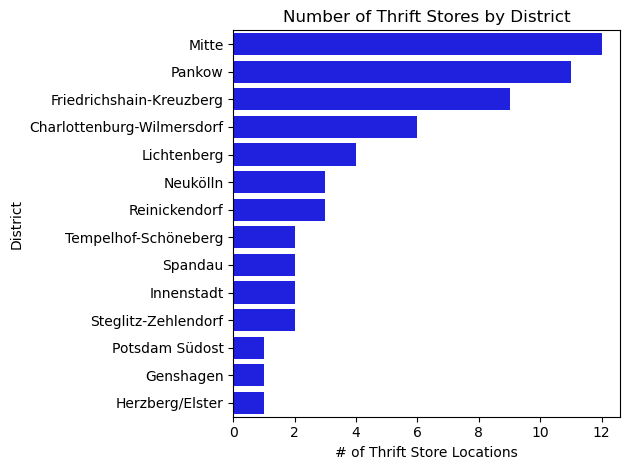

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x=thrift_district.values, y=thrift_district.index, color="Blue")

# Customize the plot 
plt.xlabel('# of Thrift Store Locations')
plt.ylabel('District')
plt.title('Number of Thrift Stores by District')

# Show the plot
plt.tight_layout()  # Adjust layout so everything fits without overlap
plt.show()

/var/folders/l2/5dz48bnd55v2vjw18pnq7ftm0000gn/T/ipykernel_71301/4259567231.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(districts.geometry.centroid.x, districts.geometry.centroid.y, districts['Gemeinde_name']):


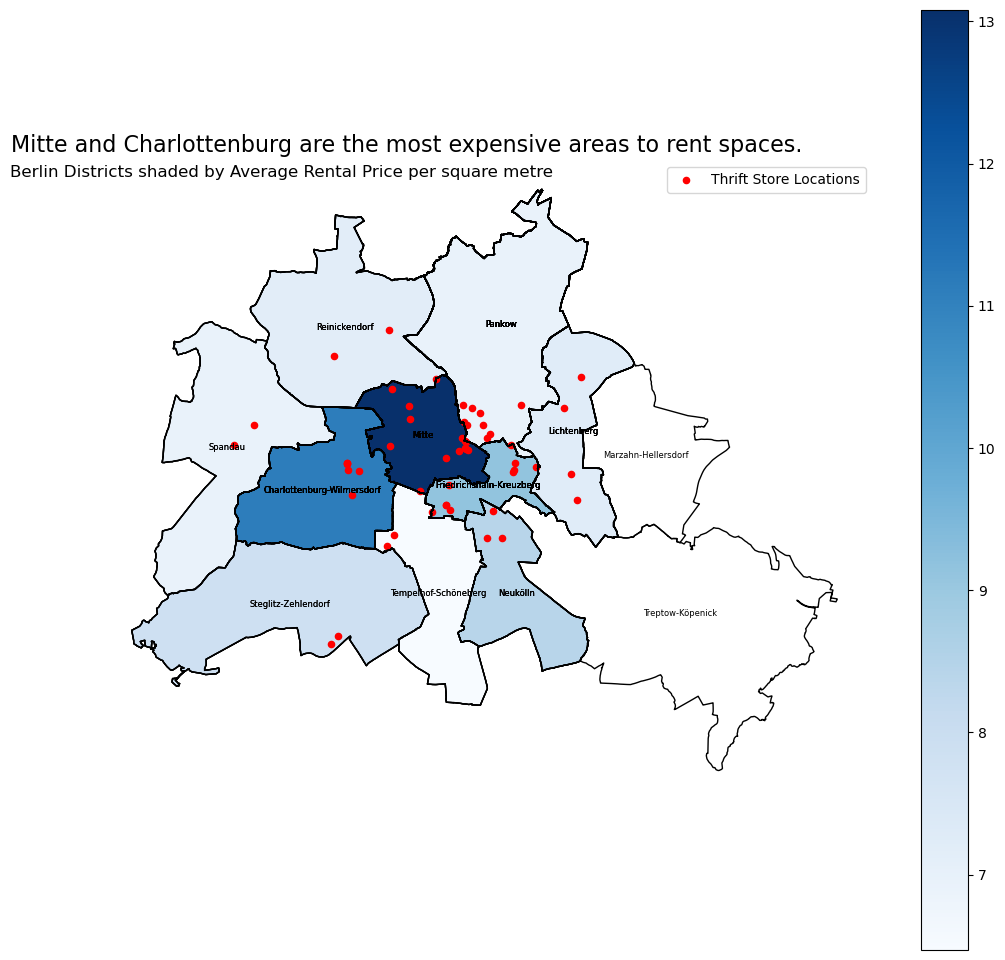

In [47]:
# Load the Berlin districts GeoJSON
districts = gpd.read_file('/Users/arjunchahal/Desktop/ESMT/Data Scraping/Working_Directory/working_folder/Group Project/bezirksgrenzen.geojson')

# Merge with df_maps using a left join
districts = districts.merge(df_maps, left_on='Gemeinde_name', right_on='district', how='left')

# Plot the districts, colored by price_per_m2
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
districts.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot district boundaries
districts.plot(column='price_per_m2', ax=ax, legend=True, cmap='Blues', edgecolor='black', label = 'Avg Price/m^2')  # Shaded map using the Blues sequential colourmap

# Plot thrift store locations
df_maps.plot(kind='scatter', x='longitude', y='latitude', color='red', ax=ax, label='Thrift Store Locations')

# Display district names
for x, y, label in zip(districts.geometry.centroid.x, districts.geometry.centroid.y, districts['Gemeinde_name']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')

# Customize the plot, use x and y to manipulate title and subtitle positioning
plt.title('Mitte and Charlottenburg are the most expensive areas to rent spaces.', fontsize=16, x=0.4)
plt.suptitle('Berlin Districts shaded by Average Rental Price per square metre', x=0.2, y=0.8) 
plt.legend()

ax.set_axis_off() # hide the longitude and latitude axis

# Show the plot
plt.tight_layout()
plt.show()

# Forecast Calendar

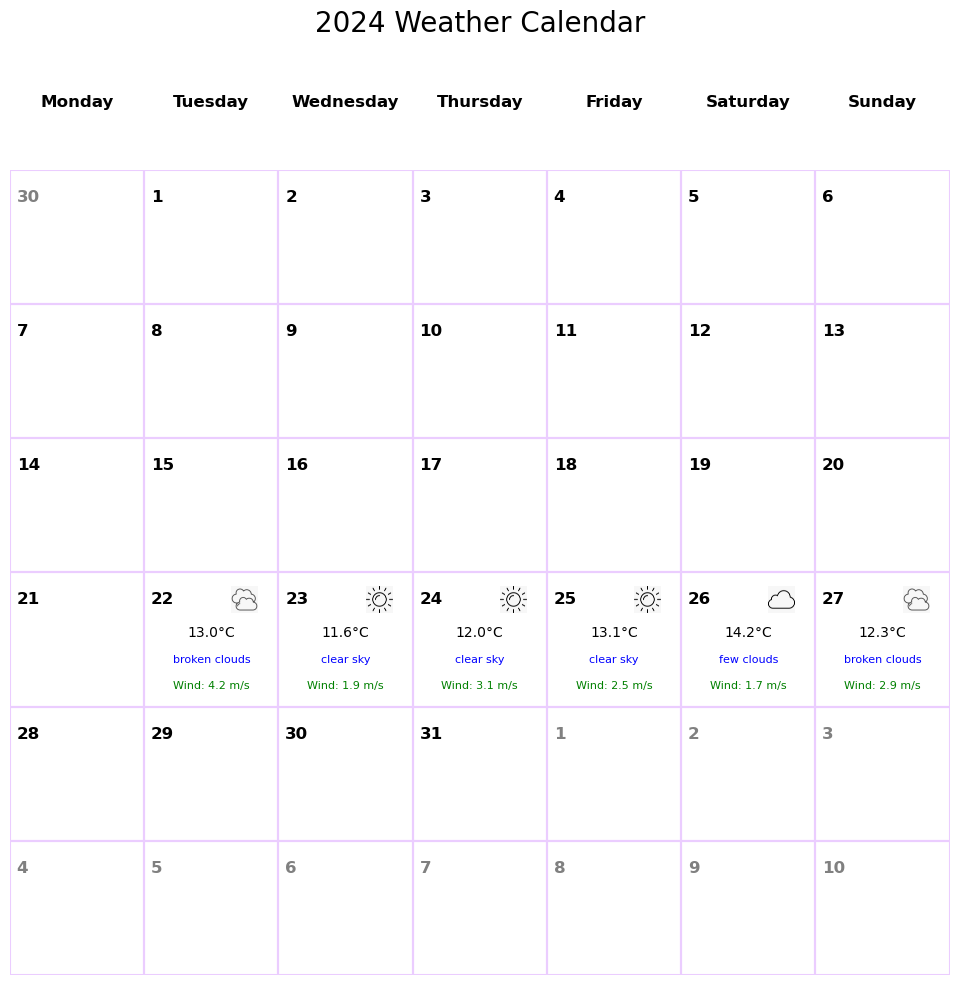

In [49]:
# Create a new figure for the October 2024 calendar
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('2024 Weather Calendar', fontsize=20)

# Add week day labels
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, day in enumerate(weekdays):
    ax.text(i + 0.5, 6.5, day, ha='center', va='center', fontsize=12, weight='bold')

# Draw the grid for the calendar
for row in range(6):
    for col in range(7):
        # Calculate day number based on grid position
        day = row * 7 + col - first_weekday + 1

        # Draw the rectangle for the cell
        rect = plt.Rectangle((col, 5 - row), 1, 1, fill=False, edgecolor='#ebcdff', linewidth=1.5)
        ax.add_patch(rect)

        # Plot the day number if it is within the range of the current month
        if 1 <= day <= num_days:
            ax.text(col + 0.05, 5 - row + 0.85, str(day), fontsize=12, ha='left', va='top', weight='bold')

            # Check if there is weather info for the current day
            current_date = pd.Timestamp(year, month, day)
            day_weather = aggregated_df[aggregated_df['Day'] == current_date]

            # If there's data for this day, add temperature, condition, wind speed, and other details
            if not day_weather.empty:
                temperature_c = day_weather['Temperature_C'].values[0]
                weather_description = day_weather['Weather_Description'].values[0]
                wind_speed = day_weather['Wind_Speed'].values[0]

                # Plot temperature, weather description, and wind speed
                ax.text(col + 0.5, 5 - row + 0.55, f'{temperature_c:.1f}°C', fontsize=10, ha='center', va='center')
                ax.text(col + 0.5, 5 - row + 0.35, weather_description, fontsize=8, ha='center', va='center', color='blue')
                ax.text(col + 0.5, 5 - row + 0.15, f'Wind: {wind_speed:.1f} m/s', fontsize=8, ha='center', va='center', color='green')

                # Load and plot the corresponding weather icon at the top-right corner
                weather_icons = {
                    'clear sky': '/Users/arjunchahal/Desktop/ESMT/Data Scraping/Working_Directory/working_folder/Group Project/a4ff8e2e-5730-4dd8-a46a-4fe6e31efe7a.jpg',
                    'few clouds': '/Users/arjunchahal/Desktop/ESMT/Data Scraping/Working_Directory/working_folder/Group Project/0d3f9876-d96c-4ae8-ac15-5d05092c92b7.jpg',
                    'broken clouds': '/Users/arjunchahal/Desktop/ESMT/Data Scraping/Working_Directory/working_folder/Group Project/a4c4a3a0-0f9e-410b-bd45-03a22ca7ccdd.jpg',
                    'rain': '/Users/arjunchahal/Desktop/ESMT/Data Scraping/Working_Directory/working_folder/Group Project/2907ddb1-0df7-420d-9ff3-db5fd22ede80.jpg'
                }

                # If a matching weather description exists, load and display the icon
                if weather_description in weather_icons:
                    img = mpimg.imread(weather_icons[weather_description])

                    # Adjust icon size and display it in the top-right corner
                    icon_size = 0.2  # Adjust this value to change the icon size
                    ax.imshow(img, extent=(col + 0.85 - icon_size, col + 0.85, 5 - row + 0.9 - icon_size, 5 - row + 0.9))

        # Plot previous month's days if applicable
        elif day < 1:
            prev_day = prev_num_days + day
            ax.text(col + 0.05, 5 - row + 0.85, str(prev_day), fontsize=12, ha='left', va='top', color='gray', weight='bold')

        # Plot next month's days if applicable
        elif day > num_days:
            next_day = day - num_days
            ax.text(col + 0.05, 5 - row + 0.85, str(next_day), fontsize=12, ha='left', va='top', color='gray', weight='bold')

# Set the limits and remove axes
ax.set_xlim(0, 7)
ax.set_ylim(0, 6)
ax.axis('off')

# Adjust layout to make sure everything fits well
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Fashion Analysis

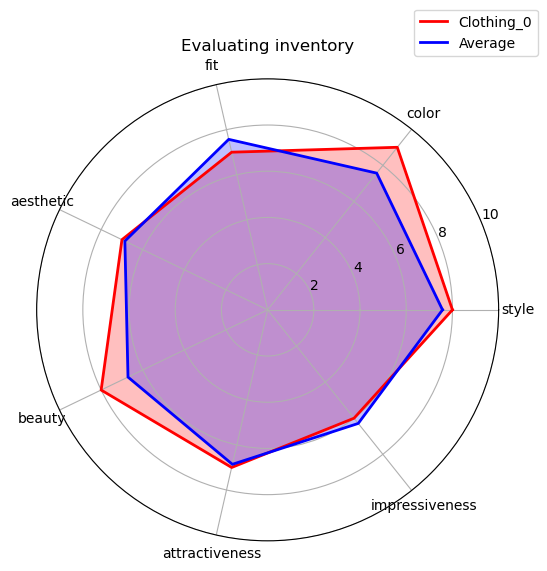

In [50]:
# Extract values for index 0 and Average
index_0 = ratings_list_df.iloc[0, :-1].values
average = ratings_list_df.iloc[-1, :-1].values

# Categories
categories = ratings_list_df.columns[:-1]  # Exclude the 'Average' column

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start
index_0 = np.concatenate((index_0, [index_0[0]]))
average = np.concatenate((average, [average[0]]))
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_ylim(0, 10)

# Plot data
ax.plot(angles, index_0, color='red', linewidth=2, linestyle='solid', label='Clothing_0')
ax.fill(angles, index_0, color='red', alpha=0.25)
ax.plot(angles, average, color='blue', linewidth=2, linestyle='solid', label='Average')
ax.fill(angles, average, color='blue', alpha=0.25)

# Add a title and legend
plt.title('Evaluating inventory')
plt.legend(loc='right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()


## Presentation | 15 points
#### Deadline: October 24th during class

> Make a presentation about your business, the data you've collected and the direction you're taking the business in the next months.

**Presentation | 1. Description of unique business idea | 1 point**

Summarise the name and choice of business as well as location and the time of year it operates (you can add some branding, logo, etc.)


**Presentation | 2. Presentation of all the APIs used and how it serves your business | 3 points**

Present each API and explain why the collected data is relevant for your business.


**Presentation | 3. Presentation of the data cleaning and processing | 2 points**

Explain the steps your team took in order to get to a clean and structured dataset.


**Presentation | 4. Presentation of the statistics  & 5. Data visualisations | 5 points**

Display the statistics and relevant data visualisations that helped you make informed decisions about your business. The descriptive statistics and visualisations enable you to draw conclusions that take your business in one or the other direction. You need to explain how this information serves your business and the next steps you will take.

**Presentation | 6. Storytelling | 4 points**

Why did you pick this business idea? Why this name?

Who is your target audience? What problem does it solve?

What decisions did you make to make your business thrive in the future? What are your current challenges? Opportunities?

Can Data save your business or make it expand to new territories?


Create a good story!